# Ground-State: J1-J2 model

$$ H = \sum_{i=1}^{L} J_{1}\vec{\sigma}_{i} \cdot \vec{\sigma}_{i+1} + J_{2} \vec{\sigma}_{i} \cdot \vec{\sigma}_{i+2} $$

# Matrix approach

In [1]:
#2 spin
import numpy as np

# 定义单自旋算符
Sx = np.array([[0, 1], [1, 0]])
Sy = np.array([[0, -1j], [1j, 0]])
Sz = np.array([[1, 0], [0, -1]])
I = np.eye(2)  # 单位矩阵

H_2spin_x= np.kron(Sx, Sx)
H_2spin_y= np.kron(Sy, Sy)
H_2spin_z= np.kron(Sz, Sz)

H_2spin=H_2spin_x+H_2spin_y+H_2spin_z

E_2spin, V_2spin = np.linalg.eigh(H_2spin)  # 计算哈密顿量的本征值和本征矢量

print(E_2spin)
print(np.real(H_2spin))

[-3.  1.  1.  1.]
[[ 1.  0.  0.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  2. -1.  0.]
 [ 0.  0.  0.  1.]]


In [2]:
# 4 spin
H1= np.kron(np.kron(np.kron(Sx, Sx), I), I)
H2 = np.kron(np.kron(np.kron(I, Sx), Sx), I)
H3 = np.kron(np.kron(np.kron(I, I), Sx), Sx)
H4 = np.kron(np.kron(np.kron(Sx, I), I), Sx)
H_x=H1+H2+H3+H4

H5= np.kron(np.kron(np.kron(Sy, Sy), I), I)
H6 = np.kron(np.kron(np.kron(I, Sy), Sy), I)
H7 = np.kron(np.kron(np.kron(I, I), Sy), Sy)
H8 = np.kron(np.kron(np.kron(Sy, I), I), Sy)
H_y=H5+H6+H7+H8


H9 = np.kron(np.kron(np.kron(Sz, Sz), I), I)
H10 = np.kron(np.kron(np.kron(I, Sz), Sz), I)
H11 = np.kron(np.kron(np.kron(I, I), Sz), Sz)
H12 = np.kron(np.kron(np.kron(Sz, I), I), Sz)
H_z=H9+H10+H11+H12

# 计算哈密顿量
H = H_x + H_y + H_z

E, V = np.linalg.eigh(H)  # 计算哈密顿量的本征值和本征矢量

E, V = np.linalg.eigh(H)

print("Ground state energy:", E[0])
print("Ground state vector:\n", V[:,0])

ground_state = V[:, 0]

Ground state energy: -7.999999999999997
Ground state vector:
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  2.88675135e-01+0.j  0.00000000e+00+0.j -5.77350269e-01+0.j
  2.88675135e-01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  2.88675135e-01+0.j -5.77350269e-01+0.j -2.48920611e-60+0.j
  2.88675135e-01+0.j -1.38178697e-76+0.j -2.48920611e-60+0.j
  0.00000000e+00+0.j]


# Exact diag and corr func

In [3]:
L=10

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义单自旋算符
Sx = 0.5*np.array([[0, 1], [1, 0]])
Sy = 0.5*np.array([[0, -1j], [1j, 0]])
Sz = 0.5*np.array([[1, 0], [0, -1]])
I = np.eye(2)  # 单位矩阵

def H_function(L, pauli_op):
    
    # Initialize H with correct shape and dtype
    H = np.zeros((2**L, 2**L), dtype=np.complex128)
    
    for i in range(L):
        operators = [I] * L # N个单位矩阵
        operators[i] = pauli_op # 第i个变成泡利算符
        operators[(i + 1) % L] = pauli_op  # 使用模运算符处理第一个和最后一个自旋对的相互作用
        
        H_term = operators[0]
        for op in operators[1:]:
            H_term = np.kron(H_term, op)
            
        H += H_term
    
    return H

def generate_total_H(L):
    H_x = H_function(L, Sx)
    H_y = H_function(L, Sy)
    H_z = H_function(L, Sz)
    return H_x, H_y, H_z


H_x, H_y, H_z = generate_total_H(L)
H=H_x+H_y+H_z
E, V = np.linalg.eigh(H)
print(E)
gst = V[:, 0]  # 基态波函数

[-4.51544635 -4.09220735 -4.09220735 ...  2.5         2.5
  2.5       ]


/opt/homebrew/Caskroom/miniconda/base/envs/playground/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniconda/base/envs/playground/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


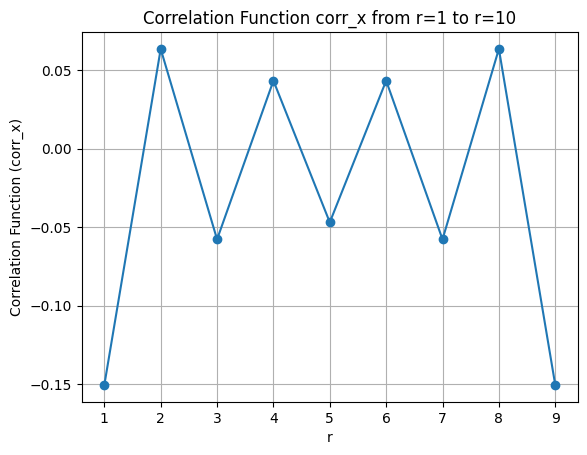

In [5]:
def correlation_function(L, r, pauli_op):
    
    # Initialize H with correct shape and dtype
    corr = np.zeros((2**L, 2**L), dtype=np.complex128)
    
    for i in range(L):
        operators = [I] * L # N个单位矩阵
        operators[i] = pauli_op # 第i个变成泡利算符
        operators[(i + r) % L] = pauli_op  # 使用模运算符处理第一个和最后一个自旋对的相互作用
        
        corr_term = operators[0]
        for op in operators[1:]:
            corr_term = np.kron(corr_term, op)
        
        corr += corr_term
    corr_func =np.dot(gst.conj().T, np.dot(corr, gst))/L
    return corr_func

def generate_total_H(L,r):
    corr_x = correlation_function(L, r, Sx)
    corr_y = correlation_function(L, r, Sy)
    corr_z = correlation_function(L, r, Sz)
    return corr_x, corr_y, corr_z

x_values = range(1, L)
y_values = []

for r in x_values:
    corr_x, _, _ = generate_total_H(L, r)
    y_values.append(corr_x)

plt.plot(x_values, y_values, marker='o')
plt.xlabel('r')
plt.ylabel('Correlation Function (corr_x)')
plt.title('Correlation Function corr_x from r=1 to r=10')
plt.grid(True)
plt.show()